In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

import warnings
warnings.filterwarnings('ignore')

In [4]:
# veriyi içi aktar
(X_train,Y_train),(X_test,Y_test)  = imdb.load_data(path="ibdb.npz",
                                                    num_words = None,
                                                    skip_top=0,
                                                    seed=113,
                                                    start_char=1,
                                                    oov_char = 2,
                                                    index_from = 3)
#num words : kelime sayısı
                                                   

In [5]:
# verinin tipine bakalım 
print("X eğitim tipi : " ,type(X_train))
print("Y eğitim tipi : " ,type(Y_train))

X eğitim tipi :  <class 'numpy.ndarray'>
Y eğitim tipi :  <class 'numpy.ndarray'>


In [6]:
#verinin şekli
print("X eğitim şekli : " ,X_train.shape)
print("Y eğitim şekli : " , Y_train.shape)

X eğitim şekli :  (25000,)
Y eğitim şekli :  (25000,)


In [7]:
#kaç tane etiket var
print("Y eğitim değerleri : ",np.unique(Y_train))
print("Y test değerleri : ",np.unique(Y_test))

Y eğitim değerleri :  [0 1]
Y test değerleri :  [0 1]


In [8]:
#eğitim  veri setinin dağılımına bakalım
unique , counts = np.unique(Y_train, return_counts= True )
print("Y eğitim dağılımı : ",dict(zip(unique,counts)))

Y eğitim dağılımı :  {0: 12500, 1: 12500}


In [10]:
#test veri setinin dağılımına bakalım
unique , counts = np.unique(Y_test, return_counts= True )
print("Y test dağılımı : ",dict(zip(unique,counts)))
#return_counts= True kaç adet var

Y test dağılımı :  {0: 12500, 1: 12500}


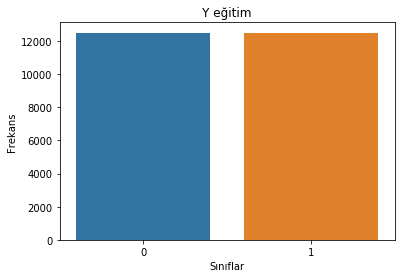

In [13]:
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Sınıflar")
plt.ylabel("Frekans")
plt.title("Y eğitim")
plt.show()

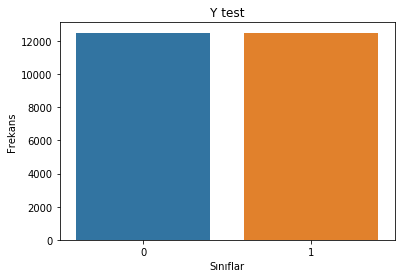

In [14]:
plt.figure()
sns.countplot(Y_test)
plt.xlabel("Sınıflar")
plt.ylabel("Frekans")
plt.title("Y test")
plt.show()

In [15]:
# örnek bir yoruma bakacak olursak
yorum = X_train[0]
print("Yorum : ")
print(yorum)
print("Yorum kelime sayısı : ",len(yorum))

Yorum : 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Yorum kelime sayısı :  218


Bu sayıların her biri bir kelimeye karşılık geliyor

In [16]:
# kelime sayısı
word_index = imdb.get_word_index()
print("Kelime sayısı : " , len(word_index))

1646592/1641221 [==============================] - 2s 1us/step
Kelime sayısı :  88584


In [19]:
for keys , values in word_index.items():
    if values==4:
        print(keys)

of


In [36]:
def neSoyledi(index= 24):
    ters_index = dict([(value, key) for (key, value) in word_index.items()])
    yorumu_coz = " ".join( [ters_index.get(i - 3, "#") for i in X_train[index]])
    
    print("Yorum  : " ,index)
    print(yorumu_coz)
    print()
    if Y_train[index]==0:
        print("Olumsuz")
    else:
        print("Olumlu")
    print()  
    
neSoyledi()

Yorum  :  24
# the original demille movie was made in 1938 with frederic march a very good film indeed hollywood's love of remakes brings us a fairly interesting movie starring yul brynner he of course was brilliant as he almost always seemed to be in all of his movies charlton heston as andrew jackson was a stroke of genius however the movie did tend to get a little long in places it does not move at the pace of the 1938 version still it is a fun movie that should be seen at least once

Olumlu



In [37]:
neSoyledi(36)

Yorum  :  36
# sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up

Olumsuz



Veri Ön İşleme

En çok kullanılan 15.000 kelime ile sınırlandıralım.

Tekrarlanan sinir ağı girdi sayısını belirleyelim.(Bir yorumun kaç kelime olacağı)

In [41]:
# en çok kullanılan 15000 kelime ile işlem yapalım
num_words=15000
(X_train,Y_train),(X_test,Y_test)  = imdb.load_data(num_words = num_words)

In [44]:
#yıorumları maksimum 130 krlime ile sınırlandıracağız
#tekrarlanan sinir ağında girdinin boyutu sabit olmalı;bu nedenle yaptık
maxlen=130
X_train = pad_sequences(X_train,maxlen = maxlen)
X_test = pad_sequences(X_test,maxlen = maxlen)

print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


TEKRARLANAN SİNİR AĞI OLUŞTURMA                
     iki farklı etiket olduğu için sigmoid fonksiyonu kullanalım.

In [49]:
rnn = Sequential()
#Embedding : pozitif tam sayıları (dizinler) sabit boyutlu yoğun vektörlere dönüştürüyor
rnn.add(Embedding(num_words,32,input_length=len(X_train[0])))
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen),
                 return_sequences = False,activation = "relu"))

rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 130, 32)           480000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
#modeli derleyelim
rnn.compile(loss="binary_crossentropy",
           optimizer="adam",
           metrics =["accuracy"])

In [81]:
#Eğitim
history = rnn.fit(X_train,Y_train ,validation_data = (X_test,Y_test),epochs=5,batch_size= 128,verbose =1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 11s 449us/step - loss: 0.0141 - acc: 0.9957 - val_loss: 1.0709 - val_acc: 0.8154
Epoch 2/5
25000/25000 [==============================] - 12s 484us/step - loss: 0.0377 - acc: 0.9887 - val_loss: 1.1644 - val_acc: 0.8034
Epoch 3/5
25000/25000 [==============================] - 12s 474us/step - loss: 0.0197 - acc: 0.9942 - val_loss: 1.0348 - val_acc: 0.8181
Epoch 4/5
25000/25000 [==============================] - 12s 487us/step - loss: 0.0178 - acc: 0.9951 - val_loss: 1.0260 - val_acc: 0.8175
Epoch 5/5
25000/25000 [==============================] - 13s 503us/step - loss: 0.0060 - acc: 0.9985 - val_loss: 1.2526 - val_acc: 0.8160


In [84]:
dogruluk = rnn.evaluate(X_test,Y_test)
print("Test Doğruluk : % ",dogruluk[1]*100)

25000/25000 [==============================] - 6s 259us/step
Test Doğruluk : %  81.604


Sonuçların Değerlendirilmesi

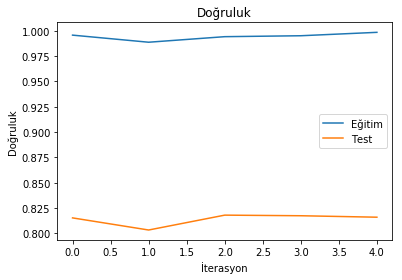

In [85]:
plt.figure()
plt.plot(history.history["acc"],label ="Eğitim")
plt.plot(history.history["val_acc"],label ="Test")

plt.title("Doğruluk")
plt.ylabel("Doğruluk")
plt.xlabel("İterasyon")
plt.legend()
plt.show()


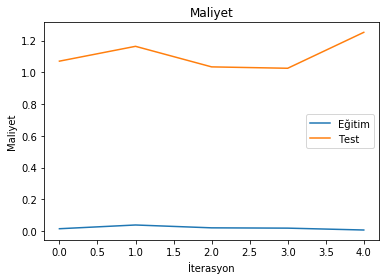

In [86]:
plt.figure()
plt.plot(history.history["loss"],label ="Eğitim")
plt.plot(history.history["val_loss"],label ="Test")

plt.title("Maliyet")
plt.ylabel("Maliyet")
plt.xlabel("İterasyon")
plt.legend()
plt.show()